In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sorting_time.txt', sep="\t", error_bad_lines=False)
df.set_index("Size", inplace= True)
df.replace(0.000000, 0.000001, inplace = True) #This is done because it is not sensible to have an algorithm running in time 0,
#therefore we approximate it as 0.000001
y_cols = df.columns[0:]

In [3]:
df.head(5)

,IS_random,IS_best,Is_worst,QS Random,QS Worst,Bubble,SelSort,HeapSort
Size,,,,,,,,
2^2,0.000001,0.000001,0.000001,0.000003,0.000001,0.000001,0.000001,0.000004
2^3,0.000001,0.000004,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
2^4,0.000001,0.000001,0.000003,0.000002,0.000002,0.000001,0.000001,0.000003
2^5,0.000006,0.000001,0.000010,0.000004,0.000005,0.000007,0.000002,0.000006
2^6,0.000021,0.000001,0.000041,0.000014,0.000017,0.000027,0.000007,0.000014


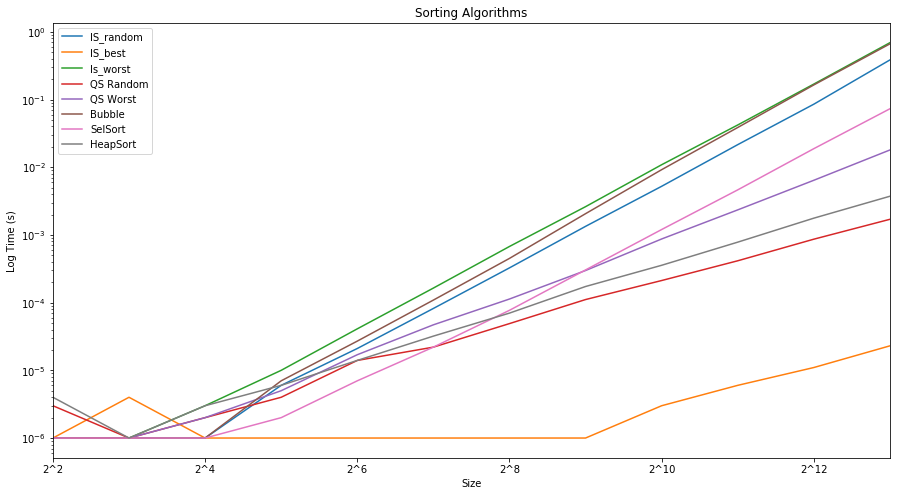

In [7]:
ax = df.plot(y=y_cols, logy = True, figsize = (15,8), title = "Sorting Algorithms")
ax.set_ylabel("Log Time (s)")
fig = ax.get_figure()
fig.savefig("SortingTimes.png")

The fact that Insertion Sort on its best case is this much better with respect to other algorithms is the real reason why it does still make sense to use it sometimes (for example in a situation in which the array is known to be almost ordered). Also we can clearly notice how selection sort scales much worse than heap sort and Quick Sort, despite being effective for short arrays due to a small overhead on its execution. Last but not least we can notice how Random and worst scenario for quicksort does indeed differ when size of the array increases a bit.

In [29]:
df_2 = pd.read_csv('test_sorting_n_logn.txt', sep="\t", error_bad_lines=False)
df_2.set_index("Size", inplace= True)
y_cols_2 = df_2.columns[0:]
df_2.head(5)

,QS(Rand),QS + Sel (Rand),Heap Sort
Size,,,
2^12,0.000949,0.004028,0.001716
2^13,0.001787,0.008596,0.004537
2^14,0.007785,0.020336,0.008233
2^15,0.006940,0.031137,0.017882
2^16,0.014460,0.063364,0.037068


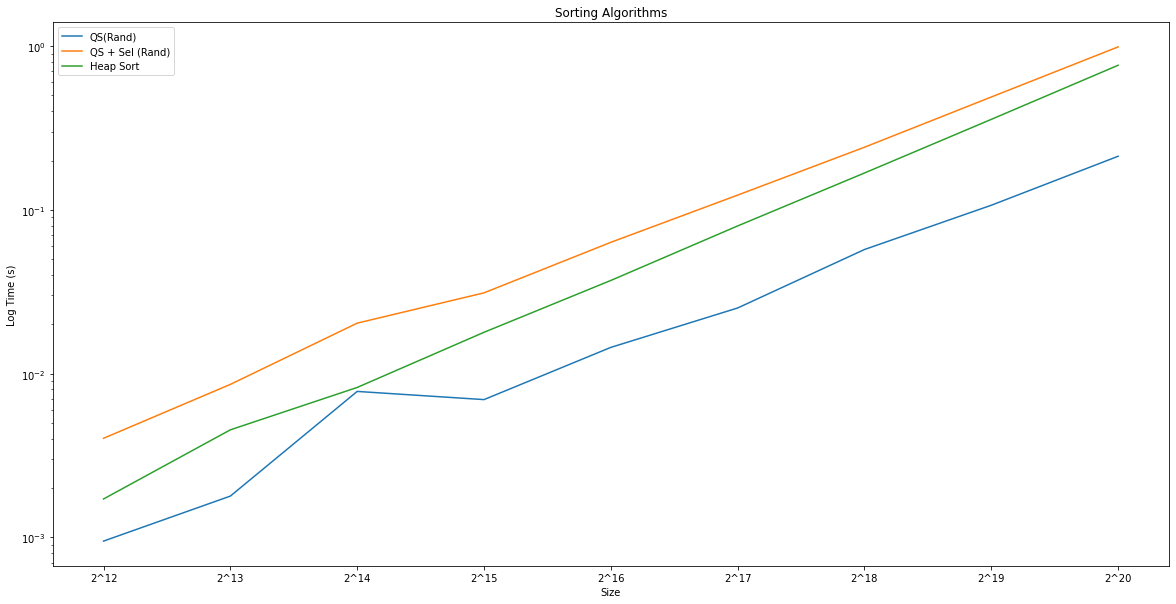

In [30]:
ax = df_2.plot(y=y_cols_2, logy = True, figsize = (20,10), title = "Sorting Algorithms")
ax.set_ylabel("Log Time (s)")
fig = ax.get_figure()
fig.savefig("SortingTimesNLogN.png")


### 3. 
Argue about the following statement and answer the questions

(a) HEAP SORT on a array A whose length is n takes time $O(n)$.

(b) HEAP SORT on a array A whose length is n takes time $\Omega(n)$.

(c) What is the worst case complexity for HEAP SORT?

(d) QUICK SORT on a array A whose length is n takes time O($n^3$).

(e) What is the complexity of QUICK SORT?

(f) BUBBLE SORT on a array A whose length is n takes time O(n).

(g) What is the complexity of BUBBLE SORT?

#### Solution

a) False, since we have no information whether the array is sorted or not. We know that every sorting method based on comparison, **in the worst case**, has a complexity of order $\Omega(n \cdot log n)$, i.e. it is not possible to perform a sorting (in the worst case scenario) using comparisons in a complexity asymptotically better than $(n \cdot log n)$

b) True for Heap Sort, since in the best case scenario (already sorted array) our algorithm will perform exactly n steps. Every other scenario will have a greater complexity thus being a function $g(n) \geq n$ hence $\Omega(n)$

c) The worst case scenario for heap sort is given by $O(n \cdot log n)$ since it would take $log(n)$ iteration for each extraction of the maximum, and this process needs to be repeated $n$ times

d) False. Quicksort's worst case scenario (repeatedly bad pivot choice) takes time $O(n)$.

e) The complexity of Quicksort on an average case is $O(n \cdot log(n))$

f) This is false in the general case since Bubble sort can take up to $O(n^2)$ complexity to be performed.

g) The complexity of bubble sort is $O(n^2)$ on an average array (not necessarily completely unordered), since at each iteration (and we need to do n of them) only a portion of lenght equal to the number of iterations completed is guaranteed to be sorted.

### 4. 
Solve the following recursive equation:
$$ T(n) = 
\begin{cases} 
1 \:\:\:\:\: \:\:\:\:\: \:\:\:\:\:  \:\:\:\:\:  \:\:\:\:\:  \:\:\: if \: n = 32 \\
3T(\frac{n}{4}) + \Theta(n^{\frac{3}{2}}) \:\:\:\:\: otherwise \\
\end{cases}
$$

#### Solution

First of all let's consider $T(128) = 3T(32) + \Theta(128^\frac{3}{2}) = 3 O(1) + \Theta(128^\frac{3}{2})$.

This is the last step to be considered when iterating over $T(n)$. 

Performing the iteration we can see that 
$$ 
T(n) = \Theta(n^{\frac{3}{2}}) + 3 (\Theta((\frac{n}{4})^{\frac{3}{2}})) + ... = \sum_{i=0} 3^i \Theta \left( \left( \frac{n}{2^{2i}} \right)^\frac{3}{2} \right)
$$

The sup of our series is found by solving the equation $ \frac{n}{2^{2i}} = 128 \rightarrow i = \frac{log_2 n - 7}{2} $

Then our sum becomes
$$
T(n) = \sum_{i=0}^{i = \frac{log_2 n - 7}{2}} 3^i \Theta \left( \left( \frac{n}{2^{2i}} \right)^\frac{3}{2} \right) = \sum_{i=0}^{i = } \left( \frac{3}{8} \right)^i \Theta \left(n ^\frac{3}{2} \right) = \Theta \left(n ^\frac{3}{2} \right) \sum_{i=0}^{i = \frac{log_2 n - 7}{2}} \left( \frac{3}{8} \right)^i
$$ 

Since we have a geometric series with $q = \frac{3}{8}$ then
$$
T(n) = \Theta \left(n ^\frac{3}{2} \right) = \frac{( \frac{3}{8})^{\frac{log_2 n - 7}{2} + 1}}{ \frac{5}{8}} = \Theta \left(n ^\frac{3}{2} \right) \cdot n^{\frac{1}{log_{\frac{3}{8}} 2}} = \Theta \left(n ^{\frac{3}{2} + \frac{1}{log_{\frac{3}{8}} 2}}\right)
$$